GD-NLP 3. 텍스트의 분포로 벡터화 하기
====

텍스트 분포를 이용한 텍스트의 벡터화 방법들(BoW, DTM, TF-IDF, LSA, LDA)을 실습을 통해 익혀보고, 텍스트 분포 기반으로 구현된 토큰화 기법에 대해서도 살펴본다.    

1. 단어 빈도를 이용한 벡터화<br>
    (1) Bag of Words<br>
    (2) Bag of Words 구현해보기<br>
    (3) DTM과 코사인 유사도<br>
    (4) DTM의 구현과 한계점<br>
    (5) TF-IDF<br>
    (6) TF-IDF 구현하기
2. LSA와 LDA<br>
    (1) LSA<br>
    (2) LSA 실습<br>
    (3) LDA<br>
    (4) LDA 실습
3. 텍스트 분포를 이용한 비지도 학습 토크나이저<br>
    (1) 형태소 분석기와 단어 미등록 문제<br>
    (2) soynlp

# 3-3. 단어 빈도를 이용한 벡터화 (2) Bag of Words 구현해보기

아래에서는 각각 텐서플로우 케라스와 사이킷런 라이브러리를 사용해 Bag of Words를 만들겠습니다.

## keras Tokenizer 활용

케라스 토크나이저를 통해 Bag of Words를 만들어 보겠습니다.

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


- fit_on_texts() : Updates internal vocabulary based on a list of texts    
    https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer#fit_on_texts
     
     
- 여기서 단어장(Vocabulary) 이라는 또 다른 개념을 이해해 보겠습니다. 문헌에 따라 사전 또는 단어 집합이라고 불리는데요. 단어장이란 중복을 제거한 단어들의 집합을 말합니다. 이는 Bag of Words랑은 다른 개념입니다.     
    위의 예제에서는 단어장의 크기가 10개네요!

In [2]:
type(tokenizer.word_counts)

collections.OrderedDict

## scikit-learn CountVectorizer 활용

Bag of Words를 만드는 또 다른 방법은 사이킷런의 CountVectorizer를 사용하는 것입니다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


- CountVectorizer() : Convert a collection of text documents to a matrix of token counts    
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html    
    + vocabulary_ : (dict) A mapping of terms to feature indices
- fit_transform() : Learn the vocabulary dictionary and return document-term matrix    
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform    
- toarray() : Return a dense ndarray representation of this matrix     
    https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.spmatrix.toarray.html#scipy.sparse.spmatrix.toarray    

    
- CounterVectorizer의 vector.fit_transform(입력 문장).toarray()으로 출력되는 Bag of Words 결과를 보면 각 단어의 빈도만 출력될 뿐, 어떤 단어의 빈도인지는 나오지 않습니다. [[1 1 1 1 3 2 2 2 1 2]]이라는 값만으로는 각 숫자가 어떤 단어의 빈도인지 알 수가 없지요?

- 이는 vector.vocabulary_를 통해서 각 단어에 부여된 인덱스를 확인하면 되는데요. 주의할 점은 이 인덱스는 0부터 시작한다는 점입니다. 가령, also의 인덱스는 0이네요. 그런데 BoW에서 0번째 위치한 값은 1이니까, also의 빈도는 1입니다. 또는 likes의 인덱스는 4인데, BoW에서 4번째 위치한 값은 3이니까 likes의 빈도는 3임을 알 수 있지요!

그리고 이 Bag of Words의 단어장의 크기는 아래와 같이 구하면 되겠지요!

In [4]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


단어장이라는 개념은 Bag of Words를 위해 사용되는 개념이라기보다는, 자연어 처리에서 보편적으로 쓰이는 용어입니다. 그런데 이를 계속 강조하는 이유는 지금부터 사용할 DTM(Document-Term Matrix) 이라는 개념 이해를 돕기 위해서입니다. 지금 Bag of Words를 배우면서 이런 생각이 들지 않으셨나요? 그래서 이 개념을 도대체 어디서 사용할 수 있다는 거지? 이를 이해하기 위해서 DTM으로 가보겠습니다!

In [5]:
type(bow), type(vector.vocabulary_)

(numpy.ndarray, dict)

# 3-4. 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도

DTM(Document-Term Matrix) 은 직역하면 문서-단어 행렬입니다. DTM은 여러 문서의 Bag of Words를 하나의 행렬로 구현한 것인데요. 다시 말해 DTM은 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합시킵니다. DTM은 문서를 행으로, 단어를 열로 가지는 행렬이지만, 문헌에 따라서는 열을 문서로 하고 단어를 행으로 하여 TDM(Term-Document Matrix) 이라고 부르기도 합니다.    

DTM을 사용하면 각 문서들을 비교하고, 각 문서 간 유사도를 구할 수 있게 됩니다.    

각 문서 벡터의 유사도를 구해보겠습니다. 저자는 가장 보편적으로 사용되는 유사도 계산 방법인 코사인 유사도를 택했습니다. 아래와 같이 각 문서 벡터와 코사인 유사도 함수를 정의합니다.

In [6]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

- 코사인 유사도 : https://wikidocs.net/24603    

DTM에서 코사인 유사도는 0 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다.
    
문서1, 문서2, 문서3의 각 문서 벡터에 대해서 코사인 유사도를 계산해 보겠습니다.

In [7]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


- 문서1과 문서2의 코사인 유사도는 0.67, 문서1과 문서3의 코사인 유사도 또한 0.67입니다. 그런데 문서2와 문서3의 코사인 유사도는 1입니다. 이는 한 문서 내의 모든 단어의 빈도수가 똑같이 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이 되기 때문입니다.


# 3-5. 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점

## scikit-learn CountVectorizer 활용

사이킷런의 CountVectorizer를 이용하여 DTM을 만드는 방법은 앞서 Bag of Words를 만드는 방법과 동일합니다. 단지, 다수의 문서를 입력값으로 주면 됩니다. 다음은 3개의 문서에 대해서 DTM을 만드는 과정을 보여줍니다.



In [8]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


# 3-7. 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기

## TF-IDF 구현하기

TF-IDF를 실제로 파이썬을 통해 구현해보겠습니다! 우선 필요한 도구를 임포트합니다.

In [9]:
from math import log
import pandas as pd
print('=3')

=3


여기서는 3개의 문서를 사용할게요!

In [10]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]
print('=3')

=3


우선 DTM의 열을 만들기 위해서 문서 3개의 단어들이 모두 들어간 통합 단어장을 만들겠습니다.

In [11]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


- 현재 단어장의 크기는 13이네요. 중복을 제거한 단어들의 개수가 13개라는 의미입니다.    

이제 총 문서의 수를 변수 N에다가 저장하겠습니다. 우리는 이미 이 값이 3이라는 사실을 알고 있지요?

In [12]:
N = len(docs) # 총 문서의 수
N

3

이제 TF 함수, IDF 함수, TF-IDF 함수를 만들겠습니다.
    
여기서 IDF를 실제 구현할 때는 앞서 배운 식과는 다소 다른 식을 사용하게 됩니다. 실제로 많은 파이썬 패키지들이 앞에서 배운 식에서 조금씩 조정된, 서로 다른 식을 사용합니다.
     
우선, 여기서는 log 항의 분모에 1을 더해주겠습니다. 이는 (Bag of Words를 사용할 때 일반적인 상황은 아니지만) 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다. 그리고 log 항에 1을 더해주겠습니다. 이는 log 항의 분자와 분모값이 동일해졌을 때, log의 진수가 1이 됨에 따라서 IDF의 값이 0이 되는 것을 방지하기 위함입니다.

In [13]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

우선 TF 함수를 사용하여 DTM을 만들어봅시다.

In [14]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


각 단어의 IDF를 구해봅시다.

In [15]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


- IDF는 'likes'나 'to' 그리고 'watch'와 같이 모든 문서에 등장한 단어가 가장 낮은 값을 가집니다. 그리고 그다음으로 두 개의 문서에 등장한 'Mary'가 그다음으로 낮은 값을 가지며, 그 외의 1개의 문서에만 등장한 단어들은 가장 높은 값을 가지는 것을 볼 수 있습니다. 


이제 TF-IDF 행렬을 출력해봅시다. DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준 값입니다.


In [16]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer 활용

사이킷런으로 DTM을 만들기 위해서는 CountVectorizer를 사용했었습니다. 이와 유사하게 사이킷런에서는 TF-IDF를 자동으로 계산하여 출력하는 TfidfVectorizer를 제공합니다.
     
향후 실습 중에 결괏값이 예상과 달라 혼란이 일어나는 일이 없도록 미리 언급하자면, 사이킷런의 TfidfVectorizer 또한 이번에 배운 기본식에서 조정된 식을 사용합니다. 간단히 언급하면, TfidfVectorizer는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 log 항의 분자에도 1을 더해주며, TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다릅니다.
     
사이킷런의 TfidfVectorizer를 통해 TF-IDF 행렬을 출력해봅시다.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

In [18]:
tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

- TfidfVectorizer() : Convert a collection of raw documents to a matrix of TF-IDF features    
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html    
         
    - fit(raw_documents[, y]) : Learn vocabulary and idf from training set. Returns Fitted vectorizer.    

    - fit_transform(raw_documents[, y]) : Learn vocabulary and idf, return document-term matrix.

In [19]:
# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


- transform(raw_documents): Transform documents to document-term matrix.

# 3-9. LSA와 LDA (2) LSA 실습

우선 필요한 도구를 임포트합니다.

In [20]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('=3')

=3


In [21]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 데이터 다운로드 및 확인

실습을 위해 데이터를 다운로드합니다.

In [22]:
import os

csv_filename = os.getenv('HOME')+'/aiffel/GoingDeeper/nlp3/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/GoingDeeper/nlp3/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7fa3866b3d90>)

다운로드한 데이터를 데이터프레임에 저장하고 전체 샘플의 수를 출력합니다.

In [23]:
data = pd.read_csv(csv_filename, error_bad_lines=False)
data.shape

(1082168, 2)

약 108만 개의 샘플이 존재합니다. 5개의 샘플만 출력해봅시다.

In [24]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


publish_date는 이번 실습에 불필요하므로 headline_text만 별도로 저장합니다.

In [25]:
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


데이터에 중복이 있는지 확인해 봅시다.

In [26]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

- 약 108만 개의 샘플 중 중복을 제외하면 약 105만 개의 샘플이 존재합니다. 

이는 약 3만 개의 샘플이 중복 샘플임을 의미합니다. 중복 샘플을 제거합니다.

In [27]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

- pandas.DataFrame.reset_index() : Reset the index of the DataFrame, and use the default one instead     
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
    

## 데이터 정제 및 정규화

이제 텍스트 데이터를 정제 및 정규화하는 과정을 진행해 보겠습니다. 우선 NLTK의 토크나이저를 이용해 전체 텍스트 데이터에 대해서 단어 토큰화를 수행하고, NLTK가 제공하는 불용어 리스트를 사용하여 불용어를 제거합니다.
    
아래 과정은 다소(몇 분 정도) 시간이 걸릴 수 있으니 당황하지 마세요.

In [28]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


- pandas.DataFrame.apply() : Apply a function along an axis of the DataFrame    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
- nltk.tokenize : Tokenizers divide strings into lists of substrings    
    https://www.nltk.org/api/nltk.tokenize.html
- strpwords : like the, to and also that we sometimes want to filter out of a document before further processing     
    https://www.nltk.org/book/ch02.html     
    
이제 동일한 단어지만 다른 표현을 가지는 단어들을 하나의 단어로 통합(lemmatization)하는 단어 정규화 과정, 그리고 길이가 1 ~ 2인 단어를 제거하는 전처리를 진행합니다.

In [29]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


- nltk.stem.wordnet.WordNetLemmatizer() : Lemmatize using WordNet’s built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet    
    pos='v' : verbs     
    https://www.nltk.org/api/nltk.stem.wordnet.html#nltk.stem.wordnet.WordNetLemmatizer    
- WordNetLemmatizer().lemmatize() : Lemmatize word using WordNet’s built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.    
    https://www.nltk.org/api/nltk.stem.wordnet.html#nltk.stem.wordnet.WordNetLemmatizer.lemmatize    
    
* Lemmatisation : 언어학의 기본형 화는 단어의 변형 된 형태를 그룹화하여 단어의 기본형 또는 사전 형식으로 식별되는 단일 항목으로 분석 될 수 있도록하는 프로세스입니다. 

## 역토큰화 및 DTM 생성

DTM을 생성하는 CountVectorizer 또는 TF-IDF 행렬을 생성하는 TfidfVectorizer의 입력으로 사용하기 위해서 토큰화 과정을 역으로 되돌리는 역토큰화(detokenization) 를 수행해보겠습니다.

In [30]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('=3')

=3


전처리 최종 결과는 train_data에 저장하였습니다. 5개의 샘플을 출력해봅시다.

In [31]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

전처리 최종 결과인 train_data는 다음에 배울 LDA 실습에서도 재사용 할 예정입니다. CountVectorizer를 사용하여 DTM을 생성해봅시다. 단어의 수는 5,000개로 제한하겠습니다.

In [32]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

=3


- sklearn.feature_extraction.text.CountVectorizer()   
    : Convert a collection of text documents to a matrix of token counts    
    stop_words='english' : If 'english', a built-in stop word list for English is used    
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

DTM을 생성했습니다. DTM의 크기를 확인해봅시다.

In [33]:
print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


- DTM의 크기(shape)는 (문서의 수 × 단어 집합의 크기)입니다.

# scikit-learn TruncatedSVD 활용

이제 Truncated SVD를 통해 LSA를 수행해 봅시다. 토픽의 수를 10으로 정하겠습니다. 이는 앞서 배운 하이퍼파라미터 k에 해당되며, 행렬 Vk^T 가 k × (단어의 수)의 크기를 가지도록 DTM에 TruncatedSVD를 수행합니다.

In [34]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10 # k
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20233477e-02, -3.65226281e-03,  1.82664980e-02, ...,
         3.02473345e-03,  2.44385785e-03,  1.70366380e-02],
       [ 2.90502070e-02, -1.10307902e-02,  1.83270106e-02, ...,
        -3.31826880e-03, -1.09986647e-02,  5.95110751e-03],
       [ 5.02453688e-03, -2.02823502e-03,  9.71757102e-03, ...,
        -3.70396008e-03,  1.55965141e-03,  4.52866921e-03],
       ...,
       [ 2.95843466e-02,  3.65933277e-03,  2.46975577e-02, ...,
         2.01159496e-02,  2.10976132e-02,  3.09843216e-03],
       [ 6.24319372e-02, -4.85226519e-03,  1.37525462e-01, ...,
         7.79758448e-01,  8.43570566e-01, -2.89228058e-01],
       [ 7.10185564e-02,  2.84626858e-02,  8.27193487e-04, ...,
        -1.90858771e-02, -1.52521569e-02, -1.59734639e-02]])

- sklearn.decomposition.TruncatedSVD.fit_transform() : Fit model to X and perform dimensionality reduction on X    
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD.fit_transform

TruncatedSVD를 통해 얻은 행렬 V_k^T 의 크기를 확인해봅시다.

In [35]:
print(lsa_model.components_.shape)

(10, 5000)


- components_ : ndarray of shape (n_components, n_features)    
    The right singular vectors of the input data    
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn-decomposition-truncatedsvd    
     
행렬 V_k^T 가 k × (단어의 수) 의 크기를 가지는 것을 확인할 수 있습니다. 이제 각 행을 전체 코퍼스의 k개의 주제(topic)로 판단하고 각 주제에서 n개씩 단어를 출력해 봅시다.

In [36]:
terms = c_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n -1:-1]])

get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.7464), ('man', 0.45357), ('charge', 0.21092), ('new', 0.14094), ('court', 0.11156)]
Topic 2: [('man', 0.69433), ('charge', 0.3005), ('court', 0.16775), ('face', 0.11545), ('murder', 0.10604)]
Topic 3: [('new', 0.8368), ('plan', 0.23666), ('say', 0.18256), ('govt', 0.11097), ('council', 0.10983)]
Topic 4: [('say', 0.73856), ('plan', 0.35938), ('govt', 0.16748), ('council', 0.12752), ('urge', 0.07596)]
Topic 5: [('plan', 0.73247), ('council', 0.17962), ('govt', 0.14041), ('urge', 0.08269), ('water', 0.06609)]
Topic 6: [('govt', 0.53408), ('court', 0.24051), ('urge', 0.24029), ('fund', 0.21714), ('win', 0.16066)]
Topic 7: [('charge', 0.51865), ('court', 0.45839), ('face', 0.36212), ('murder', 0.12556), ('plan', 0.11619)]
Topic 8: [('win', 0.55349), ('court', 0.39952), ('kill', 0.21192), ('council', 0.14527), ('crash', 0.12248)]
Topic 9: [('win', 0.63778), ('charge', 0.45174), ('council', 0.0959), ('cup', 0.07022), ('open', 0.06882)]
Topic 10: [('council', 0.82259), 

- numpy.argsort() : Returns the indices that would sort an array    
    https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
- CountVectorizer().get_feature_names() : retrun list of feature names     
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names

# 3-11. LSA와 LDA (4) LDA 실습

LDA 실습은 LSA 실습 과정에서 만들어둔 전처리가 완료된 train_data를 재사용한다고 가정합니다. 해당 데이터는 역토큰화 과정을 거친 데이터입니다.

## TF-IDF 행렬 생성

LDA는 DTM 또는 TF-IDF를 입력으로 받을 수 있습니다. 여기서는 TF-IDF를 사용하겠습니다.
    
TfidfVectorizer를 사용하여 TF-IDF 행렬을 생성해봅시다. 단어의 수는 5,000개로 제한하겠습니다. TF-IDF 행렬을 생성한 후에는 행렬의 크기를 확인합시다.

In [37]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


## scikit-learn LDA Model 활용

사이킷런의 LDA 모델을 사용하여 학습합니다. LSA와 마찬가지로 동일한 사이킷런 패키지이므로 앞으로 진행되는 실습 과정은 LSA와 매우 유사합니다. 토픽의 개수는 10개로 정했습니다. 이는 n_components의 인자값입니다. 시간이 수분 정도 소요될 것이므로 느긋하게 기다려 주세요.

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.69841093, 0.0335099 , ..., 0.0335099 , 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.0366096 , 0.0366096 , 0.0366096 , ..., 0.67051361, 0.0366096 ,
        0.0366096 ],
       ...,
       [0.02914502, 0.02914502, 0.14077174, ..., 0.02914502, 0.02914502,
        0.26688721],
       [0.02637829, 0.12325014, 0.02638944, ..., 0.21422895, 0.02637829,
        0.0996168 ],
       [0.03376121, 0.03376055, 0.03376055, ..., 0.03376055, 0.50437083,
        0.03376055]])

- sklearn.decomposition.LatentDirichletAllocation()   
    components_ : (n_components, n_features) Variational parameters for topic word distribution    
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.fit_transform
    
LDA를 통해 얻은 결과 행렬의 크기를 확인해봅시다.

In [39]:
print(lda_model.components_.shape)

(10, 5000)


전체 코퍼스로부터 얻은 10개의 토픽과 각 토픽에서의 단어의 비중을 보겠습니다.

In [40]:
# LDA의 결과 토픽과 각 단어의 비중을 출력합시다.
# [[YOUR CODE]]
terms = tfidf_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('new', 6839.37079), ('government', 6344.47105), ('election', 5419.59529), ('adelaide', 4864.1739), ('home', 4048.41226)]
Topic 2: [('say', 7929.44145), ('change', 4193.89405), ('year', 3924.88995), ('live', 3625.10473), ('market', 3541.15301)]
Topic 3: [('australian', 7667.75985), ('south', 4846.36918), ('perth', 4552.99622), ('2016', 3955.96018), ('open', 3771.68108)]
Topic 4: [('trump', 8187.32772), ('school', 3966.83143), ('jail', 3245.22756), ('women', 3029.28982), ('life', 2998.44275)]
Topic 5: [('police', 5589.78951), ('melbourne', 5299.84238), ('warn', 3577.31091), ('rural', 3521.5736), ('hospital', 3106.7779)]
Topic 6: [('world', 4536.54893), ('sydney', 4406.58731), ('country', 4167.71984), ('years', 3581.99631), ('man', 3520.89397)]
Topic 7: [('charge', 5946.75892), ('day', 5062.31785), ('house', 4481.76928), ('murder', 4065.57534), ('crash', 3793.50261)]
Topic 8: [('australia', 7253.84683), ('attack', 4787.62503), ('north', 3706.11788), ('state', 3658.17043), ('wes

# 3-12. 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제

지금까지 띄어쓰기 단위의 단어 분포를 이용해서 단어나 문서를 벡터화하는 방법에 대해 알아봤습니다. 이번에는 텍스트의 분포를 이용해서 토큰화를 수행하는 비지도 학습 토크나이저에 대해서 알아봅시다.

## 형태소 분석기의 필요성

한국어는 교착어입니다. 교착어란 하나의 낱말(엄밀히는 하나의 어절)이 하나의 어근(root)(혹은 어간(stem))과 각각 단일한 기능을 가지는 하나 이상의 접사(affix)의 결합으로 이루어져 있는 언어를 말합니다. 조사라는 품사는 교착어에만 존재합니다.
    
이런 특성으로 인해 한국어는 영어와 달리 조사나 접사가 존재하며, 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않습니다.
     
영어 토큰화를 복습해봅시다. 다음과 같이 영어 문장은 단순히 띄어쓰기를 수행해도 단어 토큰화가 제대로 동작합니다.

In [41]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


그런데 한국어의 경우에는 띄어쓰기 단위로 토큰화를 하면 문제가 생깁니다. 다음과 같은 한국어 문장을 띄어쓰기 기준으로 토큰화를 진행했다고 해봅시다.

In [42]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


위의 예제 문장에서 '사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다. 이를 해결하기 위해서 한국어는 주로 형태소 분석기를 사용합니다. 가령, 형태소 분석기 중 하나인 Okt를 사용해서 형태소 분석을 할 경우에는 다음 결과를 얻습니다.

In [43]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


## 단어 미등록 문제

하지만 기존의 형태소 분석기는 등록된 단어를 기준으로 형태소를 분류해 내어 새롭게 만들어진 단어를 인식하기 어렵다는 특징이 있습니다.

In [44]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


'모두의연구소'는 하나의 단어이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보여줍니다.
     
그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기라면 어떨까요?
    
예를 들어, '모두의연구소'라는 문자열이 자주 연결되어 등장한다면 형태소라고 판단하고, '모두의연구소'라는 단어 앞, 뒤에 '최고', 'AI', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 '모두의연구소'를 형태소로 파악하는 식이지요. 이런 아이디어를 가진 형태소 분석기가 soynlp입니다.

# 3-13. 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp

soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기입니다.    
비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석합니다.     
soynlp 형태소 분석기는 내부적으로 단어 점수표로 동작합니다. 이 점수는 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용합니다.

- soynlp: https://github.com/lovit/soynlp#soynlp

## soynlp 실습

soynlp 깃허브에서 제공하는 예제 말뭉치를 다운로드합니다.

In [45]:
import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/GoingDeeper/nlp3/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('/aiffel/aiffel/GoingDeeper/nlp3/data/2016-10-20.txt',
 <http.client.HTTPMessage at 0x7fa379a2b5d0>)

다운로드 한 말뭉치를 문서 단위로 분리합니다.

In [46]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

- DoublespaceLineCorpus : https://github.com/lovit/soynlp#noun-extractor-ver-2

총 30,091개의 문서가 존재합니다. 공백이 아닌 문서에 한해 상위 3개의 문서만 출력해봅시다.

In [47]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 합니다. 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이지요. WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산할 수 있습니다.

In [48]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 2.797 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


- WordExtractor() : https://github.com/lovit/soynlp#word-extraction    
    word_score_table : Scores 라는 namedtuple 을 value 로 지니는 dict 입니다.

In [58]:
word_score_table["반포한강공원"]

Scores(cohesion_forward=0.37891487632839754, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=1.3542944153448395, left_accessor_variety=0, right_accessor_variety=6, leftside_frequency=83, rightside_frequency=0)

## soynlp의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도입니다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다.

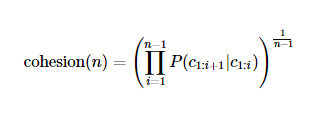

실습을 통해 직접 응집 확률을 계산해 보겠습니다.



In [49]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [50]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [51]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [52]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [53]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

응집 확률이 최대화가 되는 내부 문자열 구간은 '반포한강공원'입니다. 다시 말해 '반포한강공원'이 하나의 단어일 확률이 높습니다.

- Cohesion Score : Branching Entropy와 Accessor Variety는 단어의 좌/우의 경계에 등장하는 글자들의 정보를 이용하여 단어의 경계를 판단하는 exterior boundary scoring 방법     
    https://github.com/lovit/soynlp/blob/master/tutorials/wordextractor_lecture.ipynb

## soynlp의 브랜칭 엔트로피(branching entropy)

브랜칭 엔트로피(Branching Entropy) 는 확률 분포의 엔트로피값을 사용합니다. 이는 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도입니다.    

브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도라고 비유해 봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 있게 되므로 점차 줄어듭니다. 실습해 볼게요.

In [54]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [55]:
word_score_table["디스플"].right_branching_entropy

-0.0

- '디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가지는 반면, '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가집니다.

In [56]:
word_score_table["디스플레"].right_branching_entropy

-0.0

- '디스플레' 다음도 마찬가지겠죠. 다음 문자가 '이'라는 사실이 너무나 명백해서 0이란 값을 가집니다. 그런데 '디스플레이' 다음에는 어떤 값을 가질까요?

In [57]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

갑자기 값이 급증합니다. 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어가 나올 수 있는 다양한 경우가 있을 수 있기 때문입니다. 즉 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피값이 증가함을 의미합니다. 그러면 이 값으로 단어를 판단하는 것이 가능하겠죠?
     
soynlp 패키지는 이렇게 계산한 점수를 사용해 두 가지 문자열 토큰화 방법을 제공합니다.

## soynlp의 LTokenizer

띄어쓰기 단위로 잘 나뉜 문장은 L 토크나이저(LTokenizer)를 사용하면 좋습니다.
       
한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아내는 분리 기준을 가지고 있습니다.

In [59]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

- LTokenizer : L parts 에는 명사/동사/형용사/부사가 위치할 수 있습니다. 어절에서 L 만 잘 인식한다면 나머지 부분이 R parts 가 됩니다. LTokenizer 에는 L parts 의 단어 점수를 입력합니다.      
    https://github.com/lovit/soynlp#ltokenizer

## 최대 점수 토크나이저

최대 점수 토크나이저(MaxScoreTokenizer)는 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 토큰화된 결과를 점수를 통해 알아보겠습니다.

In [60]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

- MaxScoreTokenizer : 띄어쓰기가 제대로 지켜지지 않은 데이터라면, 문장의 띄어쓰기 기준으로 나뉘어진 단위가 L + [R] 구조라 가정할 수 없습니다. 하지만 사람은 띄어쓰기가 지켜지지 않은 문장에서 익숙한 단어부터 눈에 들어옵니다. 이 과정을 모델로 옮긴 MaxScoreTokenizer 역시 단어 점수를 이용합니다     
    https://github.com/lovit/soynlp#maxscoretokenizer